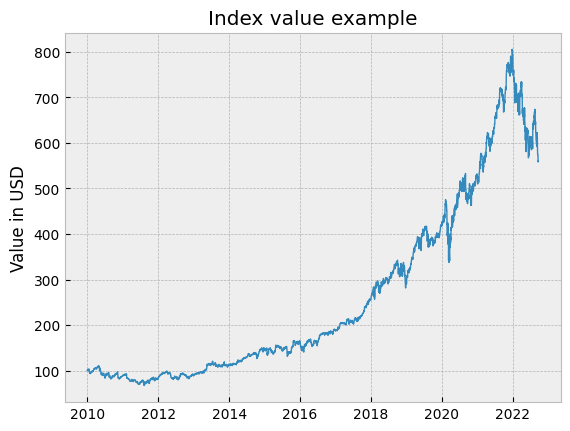

In [11]:
# Sample index without rebalancing
# An index is a portfolio with a base date, a base value
# It answers questions like "How much money would i have if i had invested base value in the portfolio at base date

from Portfolios import Portfolio, IndexValuator, PortfolioValuator
from TimeSeries import TimeSeries
import numpy as npplt
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import date


p:Portfolio = Portfolio()
p.buy('MSFT', 10)
p.buy('CSCO', 20)
# The index valuation will calculate the value of the index from its base date and base value
v:IndexValuator = IndexValuator(portfolio=p, base_date=date.fromisoformat("2010-01-01"), base_value=100)
index_valuations:TimeSeries = v.get_index_valuations()

# Another way of computing the indexed time series is to rebase the time series itself:
v:PortfolioValuator = p.valuator()
adjclose_ts:TimeSeries = v.get_valuations(start_date=date.fromisoformat("2010-01-01"))
index_valuations2 = adjclose_ts.rebase()
# We are getting access to the underlying Numpy array in order to graph it
assert(index_valuations2 == index_valuations)

#assert(index_valuations==index_valuations2)
# We are getting access to the dates in order to display them on the horizontal axis
dates = pd.date_range(index_valuations.get_start_date(), index_valuations.get_end_date(), freq='D')
# And we graph the data with style
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.set_title("Index value example")
ax.set_ylabel("Value in USD")
ax.plot(dates, index_valuations.get_full_time_series(), linewidth=1)
plt.show()
